## 関数

$$
    f(x) = \exp(\mathrm{erf}(-x^2)+x^5) \sin(5\pi x) + x
$$

In [1]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M2
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
  Threads: 5 on 4 virtual cores
Environment:
  JULIA_NUM_THREADS = 4


In [2]:
using IntervalArithmetic
using Pkg;
Pkg.status("IntervalArithmetic");

Status `~/.julia/environments/v1.10/Project.toml`
⌃ [d1acc4aa] IntervalArithmetic v0.22.8
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [3]:
using SpecialFunctions, Plots
f(x) = exp(erf(-x^2) + x^5) * sinpi(5x) + x
f(x::Interval{T}) where {T<:Real} = exp(erf(-x^interval(2)) + x^interval(5)) * sinpi(interval(5) * x) + x
f(x::Complex{Interval{T}}) where {T<:Real} = exp(erf(-x * x) + x * x * x * x * x) * sin(interval(5) * interval(π) * x) + x

f (generic function with 3 methods)

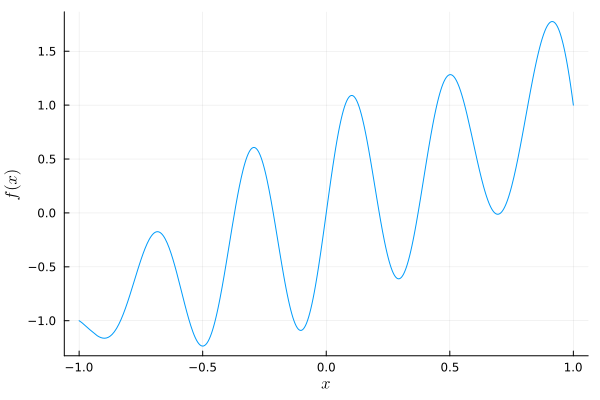

In [4]:
plot(f, -1, 1; label="", xlabel="\$x\$", ylabel="\$f(x)\$",)
# savefig("ex_minmax1.pdf")

In [5]:
# using IntervalArithmetic
include("IntervalCheb.jl")
# include("ComplexFunctions.jl")

chebmin (generic function with 2 methods)

In [6]:
# ia = interval_cheb(f, ϵ=interval(2^-67), div=2^-6)
ia = interval_cheb(f; divx=2^-9, divr=2^-6)
# ia = interval_cheb(f)
# radius.(ia)

50-element Vector{Interval{Float64}}:
 [0.0578631, 0.0578632]_com
 [1.16249, 1.1625]_com
 [0.0936986, 0.0936987]_com
 [0.112823, 0.112824]_com
 [0.0283824, 0.0283825]_com
 [0.00230576, 0.00230577]_com
 [-0.0598924, -0.0598923]_com
 [-0.157572, -0.157571]_com
 [-0.103387, -0.103386]_com
 [-0.25178, -0.251779]_com
   ⋮
 [-2.45976e-10, -2.45873e-10]_com
 [-8.73439e-11, -8.72532e-11]_com
 [1.09234e-11, 1.1034e-11]_com
 [1.12953e-11, 1.13736e-11]_com
 [1.68586e-12, 1.79318e-12]_com
 [-1.19064e-12, -1.10847e-12]_com
 [-5.17975e-13, -4.24438e-13]_com
 [6.4091e-14, 1.13787e-13]_com
 [9.10382e-15, 1.02752e-13]_com

In [7]:
# Transform the midrad form of IntervalCheb
function midrad!(ia)
    ia[1] = interval(mid(ia[1]), sum(interval(radius.(ia))); format=:midpoint)
    ia[2:end] = interval(mid.(ia[2:end]))
    # return ia
end

midrad! (generic function with 1 method)

In [8]:
midrad!(ia)
# radius.(ia)

49-element Vector{Interval{Float64}}:
 [1.16249, 1.1625]_com
 [0.0936986, 0.0936987]_com
 [0.112823, 0.112824]_com
 [0.0283824, 0.0283825]_com
 [0.00230576, 0.00230577]_com
 [-0.0598924, -0.0598923]_com
 [-0.157572, -0.157571]_com
 [-0.103387, -0.103386]_com
 [-0.25178, -0.251779]_com
 [-0.0508372, -0.0508371]_com
   ⋮
 [-2.45925e-10, -2.45924e-10]_com
 [-8.72986e-11, -8.72985e-11]_com
 [1.09786e-11, 1.09787e-11]_com
 [1.13344e-11, 1.13345e-11]_com
 [1.73951e-12, 1.73952e-12]_com
 [-1.14956e-12, -1.14955e-12]_com
 [-4.71207e-13, -4.71206e-13]_com
 [8.89386e-14, 8.89387e-14]_com
 [5.59274e-14, 5.59275e-14]_com

In [9]:
chebdiff(ia)

49-element Vector{Interval{Float64}}:
 [-0.365839, -0.365838]_com
 [-1.95099, -1.95097]_com
 [-3.05667, -3.05666]_com
 [-2.32578, -2.32577]_com
 [-3.73362, -3.73361]_com
 [-2.55284, -2.55283]_com
 [-3.75667, -3.75666]_com
 [-1.83413, -1.83412]_com
 [-1.55067, -1.55066]_com
 [-0.179939, -0.179938]_com
   ⋮
 [-1.91039e-08, -1.91038e-08]_com
 [-6.43287e-09, -6.43286e-09]_com
 [1.06191e-09, 1.06192e-09]_com
 [9.00211e-10, 9.00212e-10]_com
 [1.17744e-10, 1.17745e-10]_com
 [-9.72212e-11, -9.72211e-11]_com
 [-3.88126e-11, -3.88125e-11]_com
 [8.5381e-12, 8.53811e-12]_com
 [5.48089e-12, 5.4809e-12]_com

In [10]:
ix = chebroots(chebdiff(ia))

10-element Vector{Interval{Float64}}:
 [-0.897866, -0.897864]_com
 [-0.683018, -0.683017]_com
 [-0.499951, -0.49995]_com
 [-0.292724, -0.292723]_com
 [-0.103159, -0.103158]_com
 [0.103163, 0.103164]_com
 [0.293035, 0.293036]_com
 [0.502167, 0.502168]_com
 [0.693945, 0.693946]_com
 [0.914467, 0.914468]_com

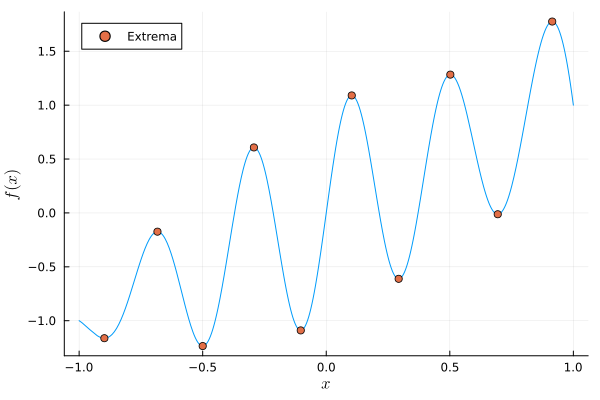

In [11]:
x = mid.(ix)
scatter!(x, f.(x); label="Extrema", xlabel="\$x\$", ylabel="\$f(x)\$",)
# savefig("ex_minmax2.pdf")

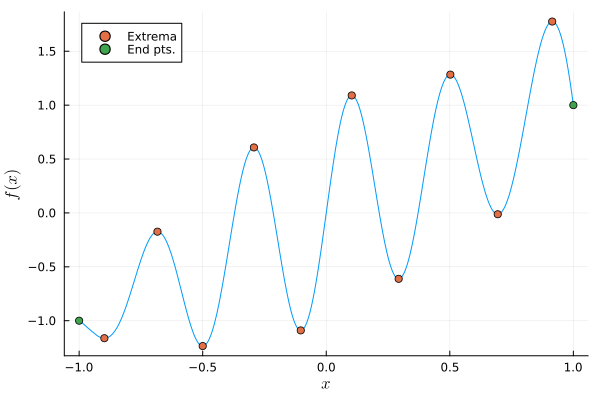

In [12]:
iep = endpoints_of_cheb(ia)
ep = mid.(iep)
ex = [-1, 1]
scatter!(ex, ep; label="End pts.")
# savefig("ex_minmax3.pdf")

In [13]:
[eval_interval_cheb(ia, x) for x in ix]

10-element Vector{Interval{Float64}}:
 [-1.16239, -1.16238]_com
 [-0.173986, -0.173985]_com
 [-1.23523, -1.23522]_com
 [0.607468, 0.607469]_com
 [-1.09, -1.08999]_com
 [1.09001, 1.09002]_com
 [-0.611358, -0.611357]_com
 [1.28309, 1.2831]_com
 [-0.01233, -0.0123299]_com
 [1.77552, 1.77553]_com

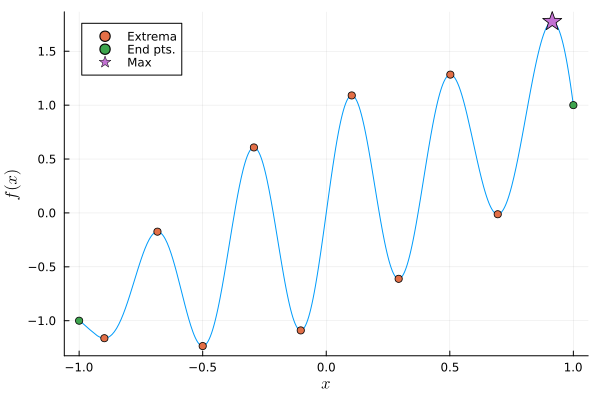

In [14]:
fxc = [eval_interval_cheb(ia, x) for x in ix]
fvals = [ep[1]; fxc[1:end]; ep[2]]
ix = [interval(-1); ix; interval(1)]
max_ind = findall(isequal_interval.(fvals, maximum((fvals))))
xmax, fmax = ix[max_ind], fvals[max_ind]
# plot(f, -1, 1,legend=false,xlabel="\$x\$",ylabel="\$f(x)\$",)
# scatter!(x,f.(x),legend=false,xlabel="\$x\$",ylabel="\$f(x)\$",)
# scatter!(ex,ep;legend=false)
scatter!(mid.(xmax), mid.(fmax); label="Max", markershape=:star5, markersize=10)
# savefig("ex_minmax4.pdf")

In [15]:
fmax

1-element Vector{Interval{Float64}}:
 [1.77552, 1.77553]_com

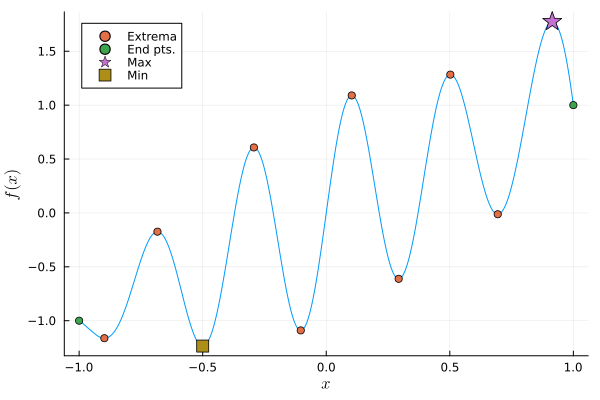

In [16]:
min_ind = findall(isequal_interval.(fvals, minimum(fvals)))
xmin, fmin = ix[min_ind], fvals[min_ind]
# scatter!(mid.(xmin), mid.(fmin); label="", markershape=:square, markersize=6)
scatter!(mid.(xmin), mid.(fmin); label="Min", markershape=:square, markersize=6)

# savefig("ex_minmax.pdf")

In [17]:
radius.(fmin)

1-element Vector{Float64}:
 1.1401901645058388e-10

In [18]:
xmin

1-element Vector{Interval{Float64}}:
 [-0.499951, -0.49995]_com

In [19]:
# radius.(ia)
# include("IntervalCheb.jl")
fmax, xmax = chebmax(ia)
radius(fmax[1])

1.2627521250863083e-10

In [20]:
radius(xmax[1])

5.703215677499429e-13

In [21]:
fmin, xmin = chebmin(ia)
radius(fmin[1])

1.1401901645058388e-10

In [22]:
radius(xmin[1])

3.809175197488912e-13